<a href="https://colab.research.google.com/github/aparecidocido/coelho-e-rato/blob/main/C%C3%B3pia_de_criado_coelho_e_rato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 8 files belonging to 2 classes.
Using 7 files for training.
Found 8 files belonging to 2 classes.
Using 1 files for validation.
Classes detectadas: ['clase_01_coelho', 'clase_02_ratos']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.2857 - loss: 0.9991 - val_accuracy: 1.0000 - val_loss: 0.3882
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8571 - loss: 0.5295 - val_accuracy: 1.0000 - val_loss: 0.2944
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.7143 - loss: 0.5398 - val_accuracy: 1.0000 - val_loss: 0.2123
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8571 - loss: 0.4595 - val_accuracy: 1.0000 - val_loss: 0.1554
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7143 - loss: 0.3975 - val_accuracy: 1.0000 - val_loss: 0.1148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.1148


Precisão no conjunto de validação: 1.00
Modelo salvo como 'modelo_personalizado.h5'


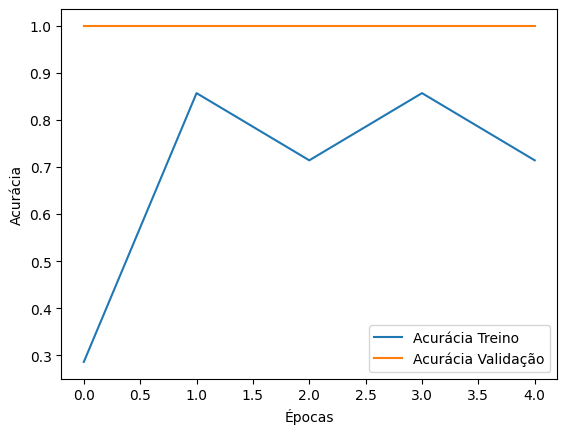

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pathlib

#
data_dir = pathlib.Path("/content/coelhosEratos")

#
img_size = (160, 160)
batch_size = 32
val_split = 0.2

#
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

#
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Classes detectadas: {class_names}")

#
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

#
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

#
base_model = keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                            include_top=False,
                                            weights="imagenet")
base_model.trainable = False

#
global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(num_classes, activation="softmax")  # Número de classes detectadas

#
inputs = keras.Input(shape=(160, 160, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

#
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#
epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

#
loss, accuracy = model.evaluate(val_ds)
print(f"Precisão no conjunto de validação: {accuracy:.2f}")

#
model.save("modelo_personalizado.h5")
print("Modelo salvo como 'modelo_personalizado.h5'")

#
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()
